In [2]:
#Librerias para analisis de datos
import numpy as np
import pandas as pd
#Librerias para procesamiento de señales
import sys
sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/Lib")  # Reemplaza 'ruta_completa_de_Lib' con la ruta real a la carpeta Lib
from Lib import AMI_Stergiou,AMI_Thomas,LyE_R,FNN,Ent_Ap,Ent_Samp

import os
import matplotlib.pyplot as plt

sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/code_descriptors_postural_control-main/code_descriptors_postural_control-main")
from stabilogram.stato import Stabilogram
#sys.path.append("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/Lib")
from descriptors import compute_all_features

import statsmodels.api as sm

In [3]:
# Estabilogramas en dirección medio-lateral (ML)
CoPx1oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ml_OC.csv", header= None)
CoPx2oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ml_OC.csv", header= None)
CoPx3oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ml_OC.csv", header= None)
# Estabilograma en direccion antero-posterior (AP)
CoPy1oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test1_ap_OC.csv", header= None)
CoPy2oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test2_ap_OC.csv", header= None)
CoPy3oc = pd.read_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/test3_ap_OC.csv", header= None)
# Estabilogramas concatenados dirección (ML-AP)
CoPxy1oc = pd.concat([CoPx1oc,CoPy1oc],axis=1)
CoPxy2oc = pd.concat([CoPx2oc,CoPy2oc],axis=1)
CoPxy3oc = pd.concat([CoPx3oc,CoPy3oc],axis=1)

# Base de datos con informacion de los pacientes 
info = pd.read_excel("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/BDSinfo.xlsx")
info[info["Surface"] == "Firm"]
info = info.groupby("Subject").head(1).reset_index(drop=True)
info['Falls'] = info['Falls12m'].apply(lambda x: 0 if x == 0 else 1)
info = info[info["Age"]>=60]

# Filtrar la base de datos respecto a los pacientes
CoPx1oc=CoPx1oc[CoPx1oc.index.isin(info['Subject']+1)]
CoPx2oc=CoPx2oc[CoPx2oc.index.isin(info['Subject']+1)]
CoPx3oc=CoPx3oc[CoPx3oc.index.isin(info['Subject']+1)]
CoPy1oc=CoPy1oc[CoPy1oc.index.isin(info['Subject']+1)]
CoPy2oc=CoPy2oc[CoPy2oc.index.isin(info['Subject']+1)]
CoPy3oc=CoPy3oc[CoPy3oc.index.isin(info['Subject']+1)]
CoPxy1oc=CoPxy1oc[CoPxy1oc.index.isin(info['Subject']+1)]
CoPxy2oc=CoPxy2oc[CoPxy2oc.index.isin(info['Subject']+1)]
CoPxy3oc=CoPxy3oc[CoPxy3oc.index.isin(info['Subject']+1)]

# Crear base de datos entradas y salidas
df_procesado = pd.DataFrame()

In [8]:
# Calculo de indices estocasticos

# Constantes

#select = ['short_time_diffusion_Diffusion_ML', 'long_time_diffusion_Diffusion_ML', 'critical_time_Diffusion_ML', 'critical_displacement_Diffusion_ML', 'short_time_scaling_Diffusion_ML', 'long_time_scaling_Diffusion_ML', 'short_time_diffusion_Diffusion_AP', 'long_time_diffusion_Diffusion_AP', 'critical_time_Diffusion_AP', 'critical_displacement_Diffusion_AP', 'short_time_scaling_Diffusion_AP', 'long_time_scaling_Diffusion_AP']
#indices = pd.DataFrame(columns=select)

indices = pd.DataFrame()
sway_density_radius = 0.3 # 3 mm

# Calcular indices para todos los pacientes
for subject in  range(CoPx1oc.shape[0]):
    #Data por pacientes
    data = np.array([CoPx1oc.iloc[subject, :].values, CoPy1oc.iloc[subject, :].values]).T
    if np.all(data != 0):
        stato = Stabilogram()
        stato.from_array(array=data, original_frequency=100)

        #Plot
        #plt.plot(stato.medio_lateral)
        #plt.plot(stato.antero_posterior)

        #Indices
        params_dic = {"sway_density_radius": sway_density_radius}
        features = compute_all_features(stato, params_dic=params_dic)
        
        for indice in list(features.keys()):
        #for indice in select:
            indices.loc[subject,indice] = features[indice]



In [13]:
# Calculo de la entropia

for subject in range(CoPx1oc.shape[0]):
    indices.loc[subject,"EntAp_ML"] =Ent_Ap.Ent_Ap(CoPx1oc.iloc[subject,:],2,0.2)
    indices.loc[subject,"EntSamp_ML"] = Ent_Samp.Ent_Samp(CoPx1oc.iloc[subject,:],2,0.2)
    indices.loc[subject,"EntAp_AP"] =Ent_Ap.Ent_Ap(CoPy1oc.iloc[subject,:],2,0.2)
    indices.loc[subject,"EntSamp_AP"] = Ent_Samp.Ent_Samp(CoPy1oc.iloc[subject,:],2,0.2)


In [19]:
indices["Fall"] = info["Falls"].values
#indices.to_csv("C:/Users/Dell/OneDrive - Universidad Autónoma del Estado de México/Documents/Maestria/Investigacion/Python/data/indices.csv")   

In [10]:
indices

mean_value_ML  mean_value_AP  mean_distance_ML  mean_distance_AP  \
0        0.749727      -0.338196          0.314572          0.179767   
1        0.773327       0.663833          1.788751          0.624778   
2       -0.596714      -0.211735          0.464342          0.104366   
3       -1.429659      -0.215469          0.375865          0.208348   
4       -0.359664       0.331826          0.219841          0.142818   
..            ...            ...               ...               ...   
71       0.492138       0.169741          0.258990          0.081966   
72       0.641469      -0.152614          0.221783          0.130700   
73      -0.014647       1.476390          0.539829          0.359653   
74       0.389447       0.025420          0.212157          0.150620   
75       0.730333      -0.124832          0.310604          0.162735   

    mean_distance_Radius  maximal_distance_ML  maximal_distance_AP  \
0               0.397378             1.193652             0.987461   
1               1.996501             3.809677             1.844119   
2               0.486250             1.501490             0.403138   
3               0.468931             1.766575             0.636998   
4               0.290128             0.883725             0.566718   
..                   ...                  ...                  ...   
71              0.283562             1.103151             0.356821   
72              0.280319             1.319803             0.780320   
73              0.710828             3.083717             1.471811   
74              0.280870             0.637780             0.549496   
75              0.381622             0.873956             0.614386   

    maximal_distance_Radius    rms_ML    rms_AP  ...  \
0                  1.222967  0.392619  0.225852  ...   
1                  3.851688  2.076991  0.738276  ...   
2                  1.501554  0.545077  0.134928  ...   
3                  1.766635  0.510569  0.242063  ...   
4                  0.887326  0.278367  0.177096  ...   
..                      ...       ...       ...  ...   
71                 1.122085  0.325732  0.103560  ...   
72                 1.468714  0.300155  0.170573  ...   
73                 3.139166  0.703637  0.450801  ...   
74                 0.640318  0.254285  0.178347  ...   
75                 0.909410  0.373801  0.206343  ...   

    critical_time_Diffusion_ML  critical_displacement_Diffusion_ML  \
0                     0.079890                            0.002579   
1                     0.074483                            0.013517   
2                     0.320478                            0.029114   
3                     0.659694                            0.124799   
4                     0.290174                            0.088071   
..                         ...                                 ...   
71                    0.388871                            0.040572   
72                    0.337216                            0.062430   
73                    0.325325                            0.742514   
74                    0.425982                            0.054832   
75                    0.239834                            0.012691   

    short_time_scaling_Diffusion_ML  long_time_scaling_Diffusion_ML  \
0                          0.858156                        0.425086   
1                          0.923055                        0.665722   
2                          0.851014                        0.300967   
3                          0.835801                        0.184704   
4                          0.883881                        0.081355   
..                              ...                             ...   
71                         0.880500                        0.168958   
72                         0.865062                        0.133234   
73                         0.895628                        0.046724   
74                         0.862354                        0.139749   
75 

In [30]:
list(indices.columns)

['mean_value_ML',
 'mean_value_AP',
 'mean_distance_ML',
 'mean_distance_AP',
 'mean_distance_Radius',
 'maximal_distance_ML',
 'maximal_distance_AP',
 'maximal_distance_Radius',
 'rms_ML',
 'rms_AP',
 'rms_Radius',
 'range_ML',
 'range_AP',
 'range_ML_AND_AP',
 'range_ratio_ML_AND_AP',
 'planar_deviation_ML_AND_AP',
 'coefficient_sway_direction_ML_AND_AP',
 'confidence_ellipse_area_ML_AND_AP',
 'principal_sway_direction_ML_AND_AP',
 'mean_velocity_ML',
 'mean_velocity_AP',
 'mean_velocity_ML_AND_AP',
 'sway_area_per_second_ML_AND_AP',
 'phase_plane_parameter_ML',
 'phase_plane_parameter_AP',
 'LFS_ML_AND_AP',
 'fractal_dimension_ML_AND_AP',
 'zero_crossing_SPD_ML',
 'peak_velocity_pos_SPD_ML',
 'peak_velocity_neg_SPD_ML',
 'peak_velocity_all_SPD_ML',
 'zero_crossing_SPD_AP',
 'peak_velocity_pos_SPD_AP',
 'peak_velocity_neg_SPD_AP',
 'peak_velocity_all_SPD_AP',
 'mean_peak_Sway_Density',
 'mean_distance_peak_Sway_Density',
 'mean_frequency_ML',
 'mean_frequency_AP',
 'mean_frequency_ML

C:\Users\Dell\AppData\Local\Temp\ipykernel_21076\188652450.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=indices[indices['Fall'] == 0][indice], shade=True, color='green', label='Fall = 0', ax=ax)
C:\Users\Dell\AppData\Local\Temp\ipykernel_21076\188652450.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=indices[indices['Fall'] == 1][indice], shade=True, color='red', label='Fall = 1', ax=ax)
C:\Users\Dell\AppData\Local\Temp\ipykernel_21076\188652450.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=indices[indices['Fall'] == 0][indice], shade=True, color='green', label='Fall = 0', ax=ax)
C:\Use

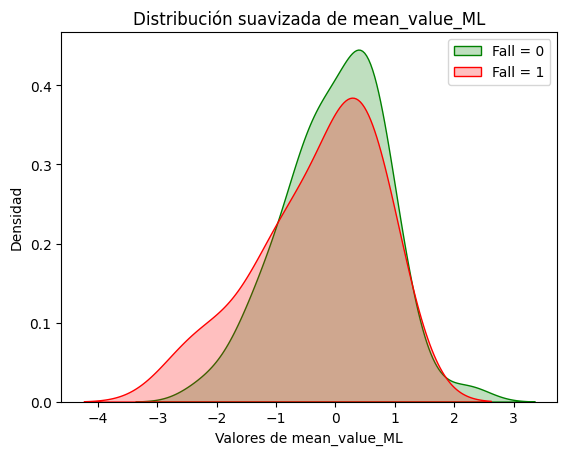

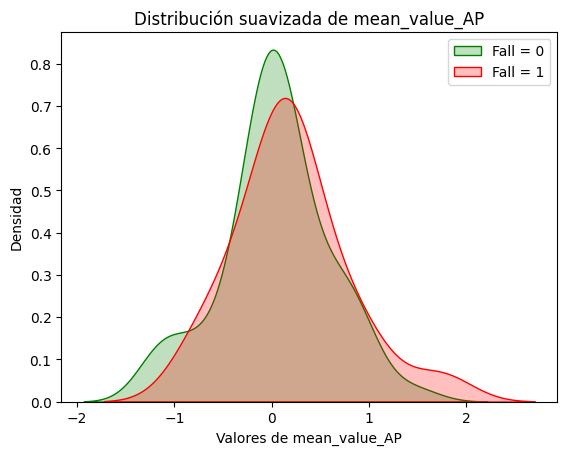

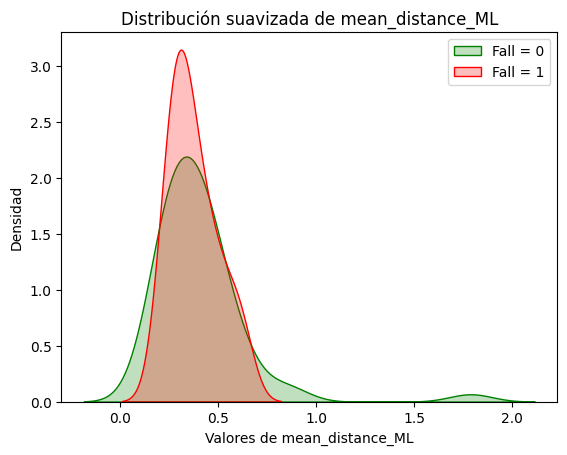

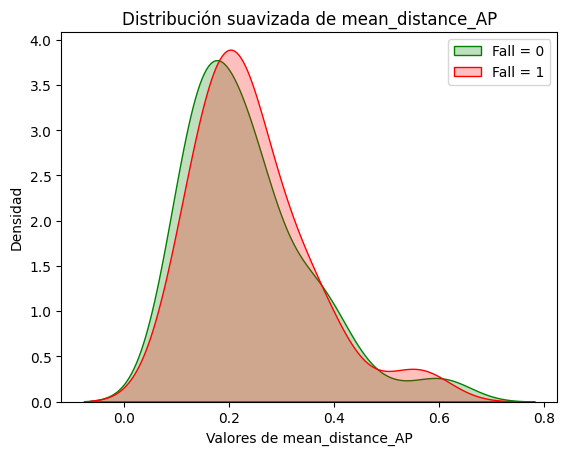

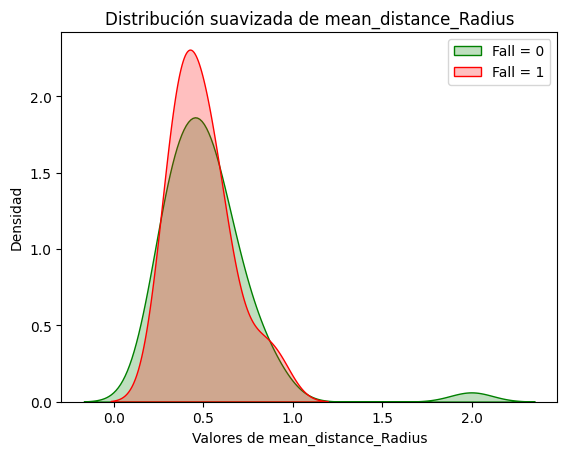

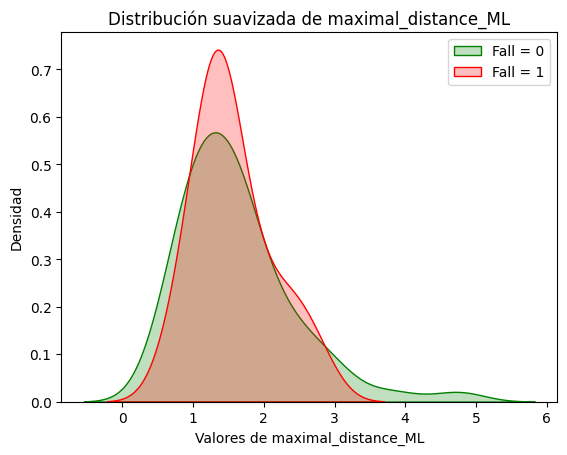

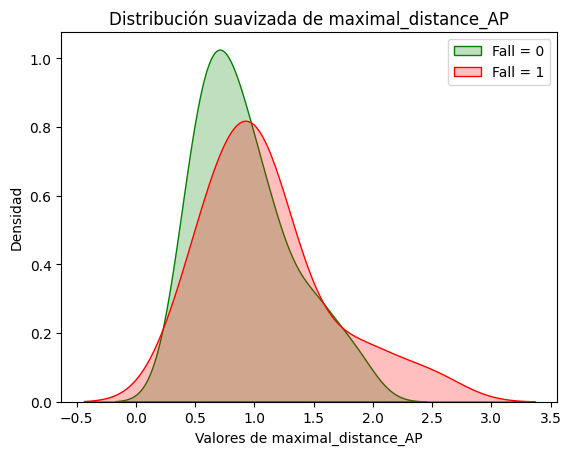

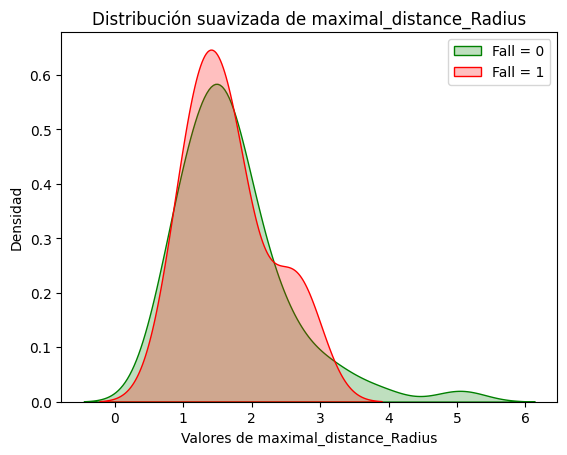

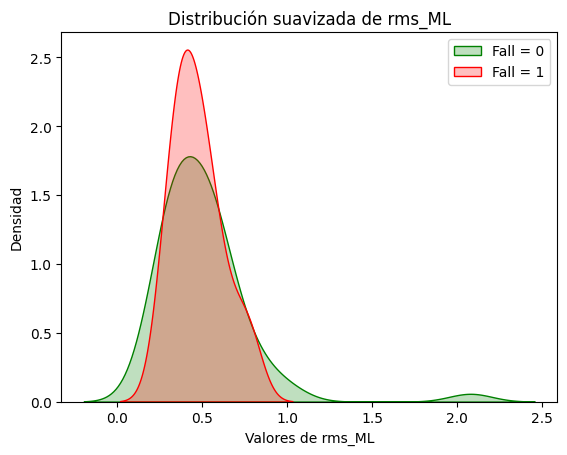

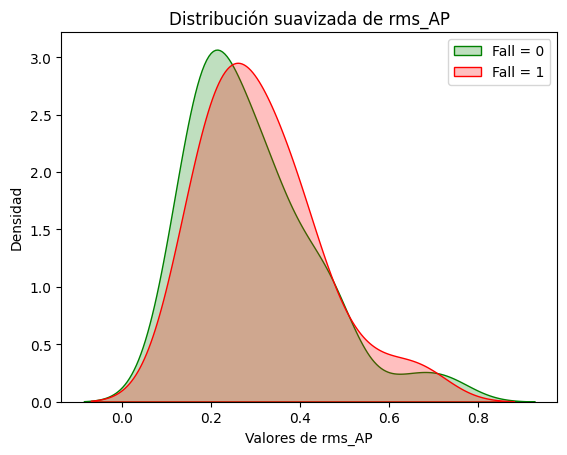

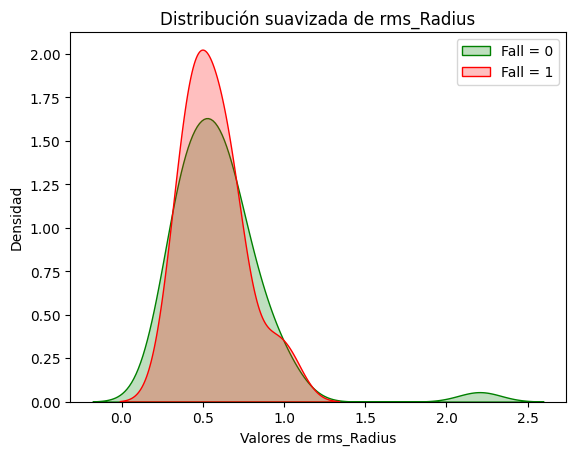

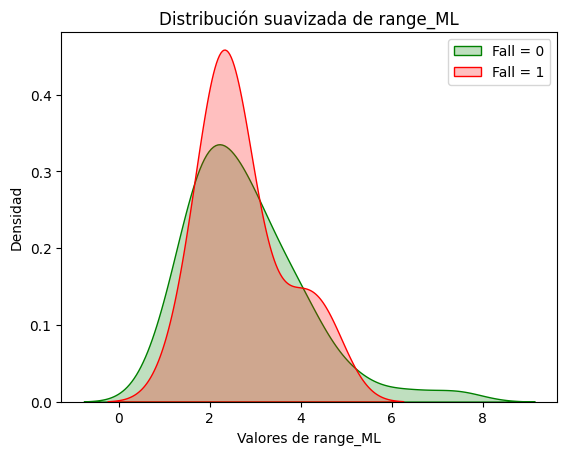

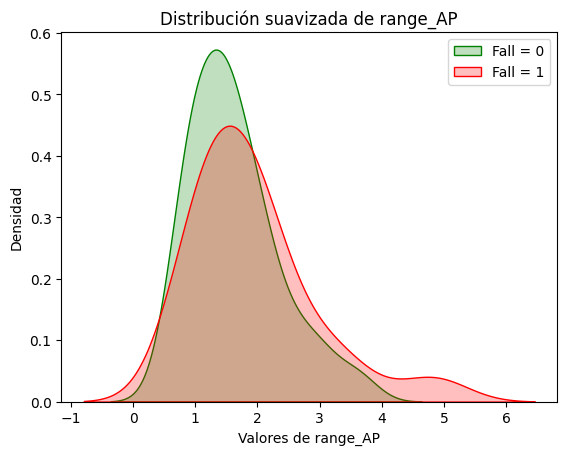

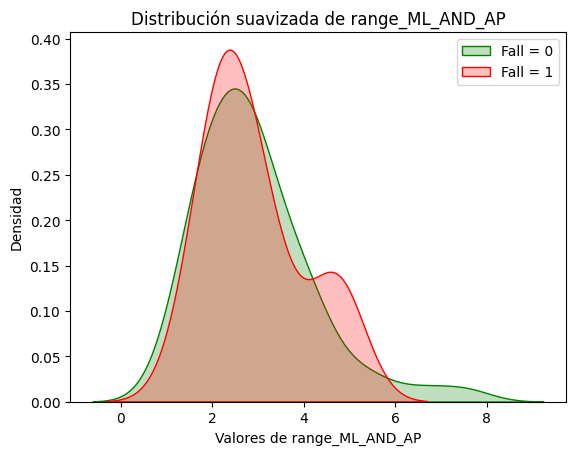

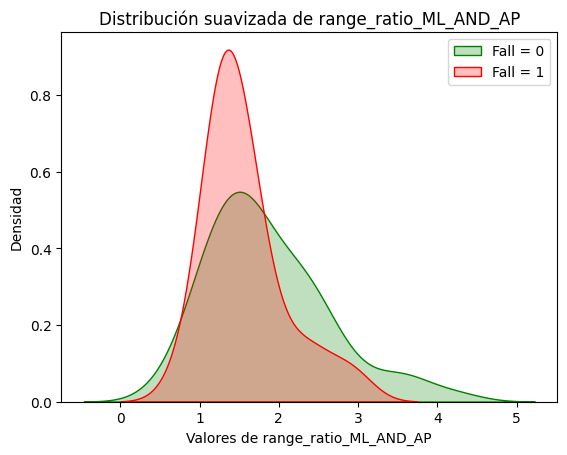

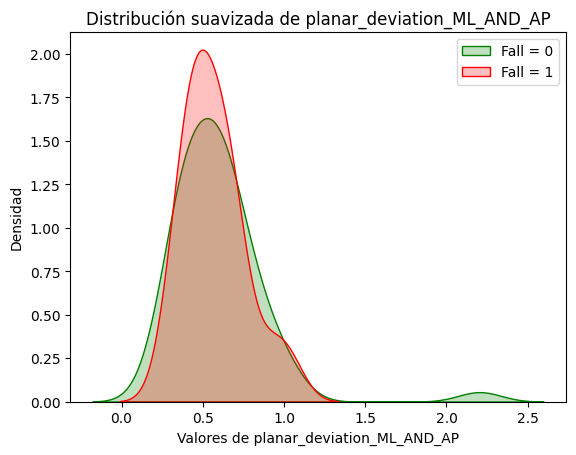

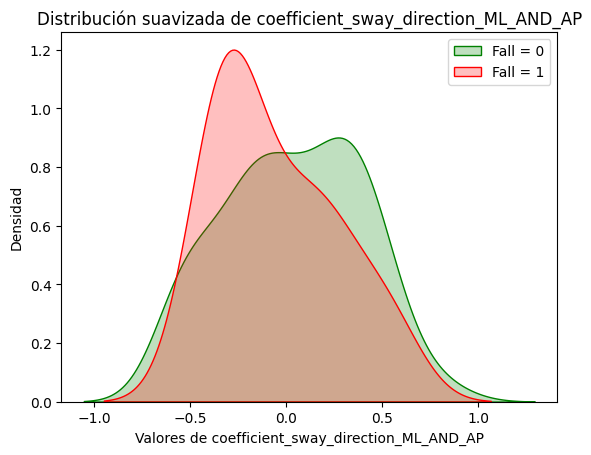

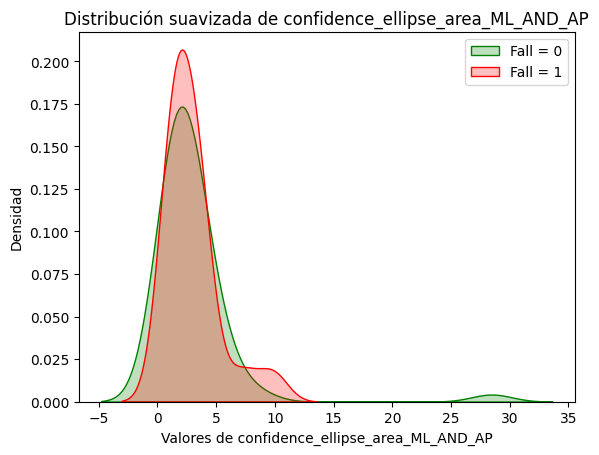

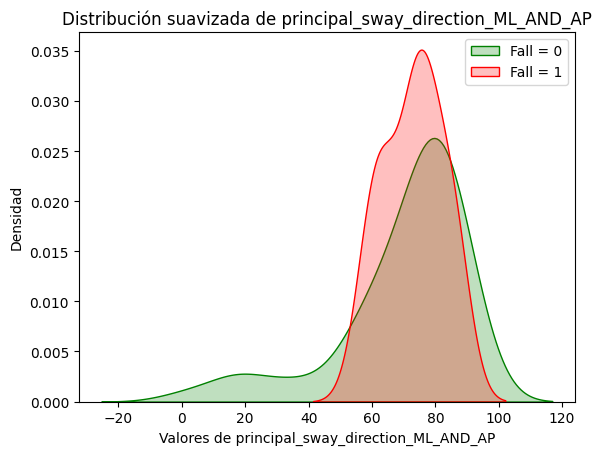

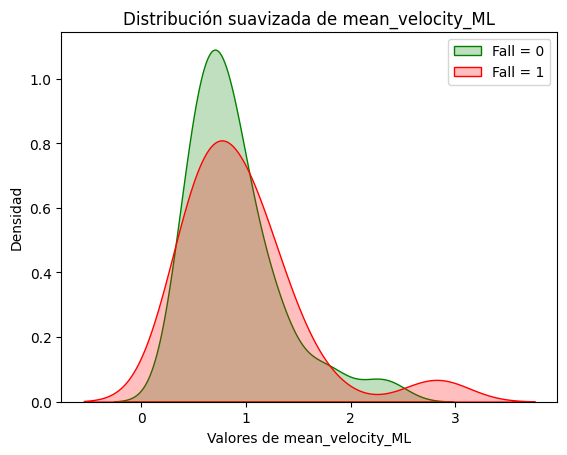

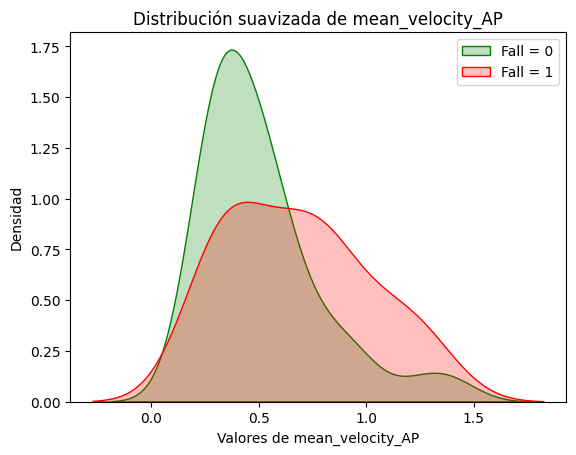

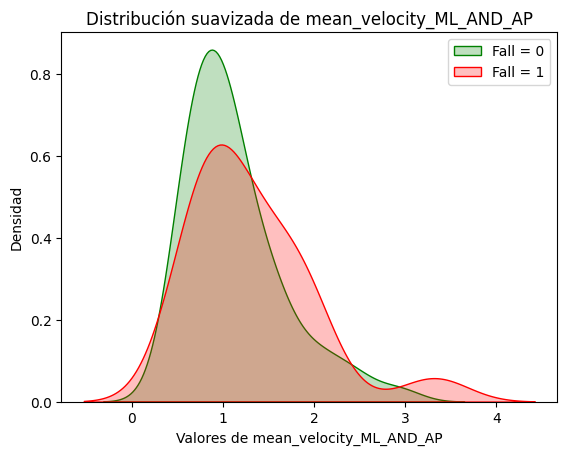

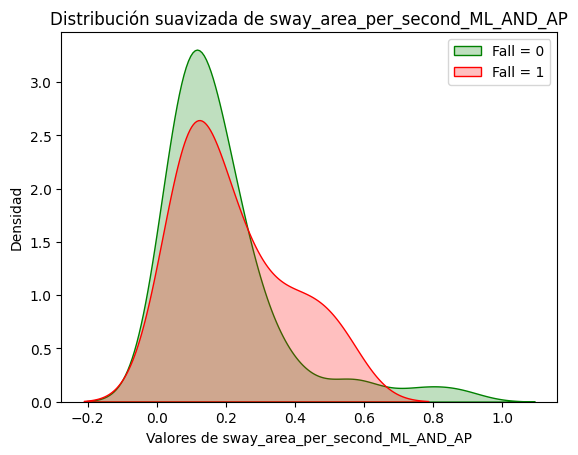

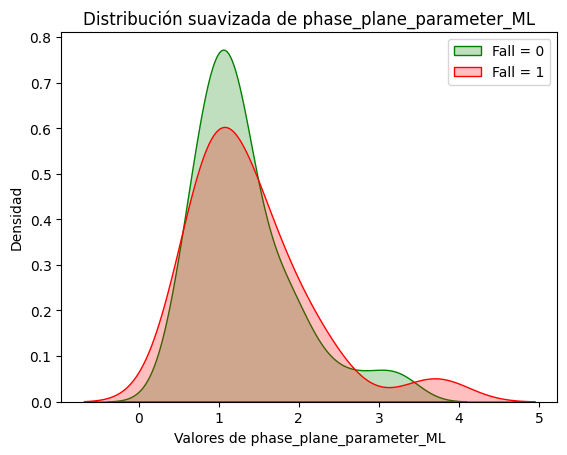

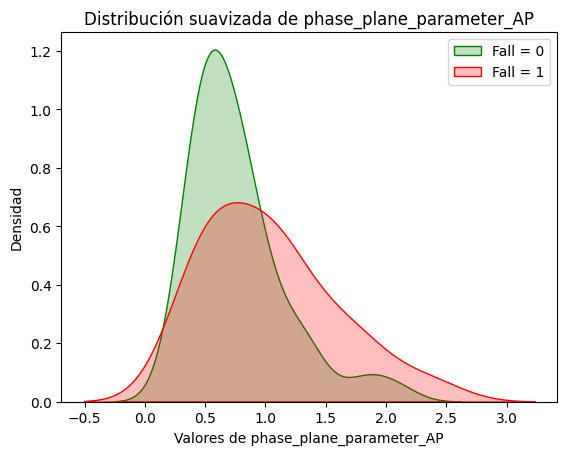

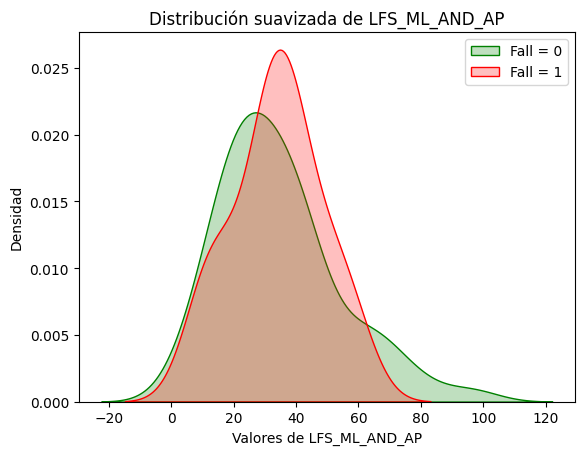

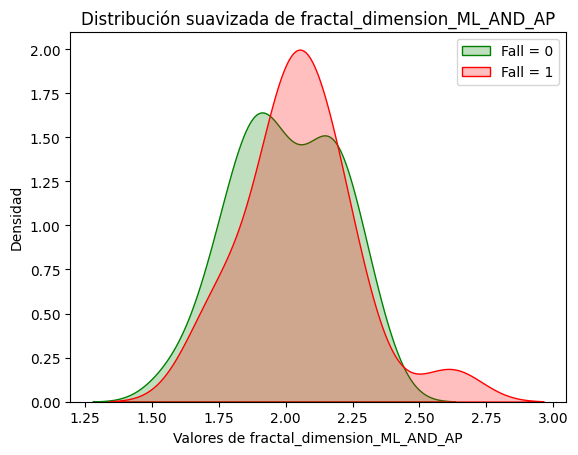

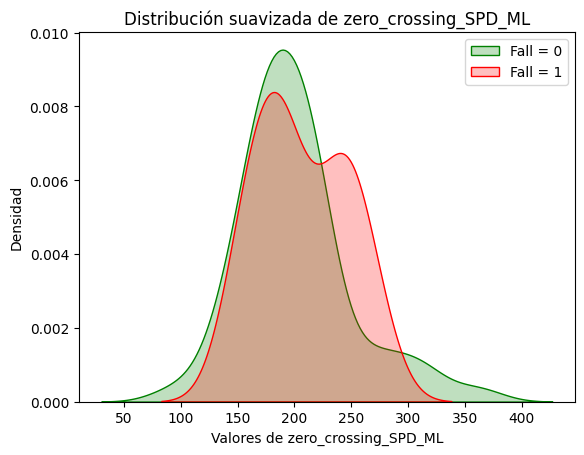

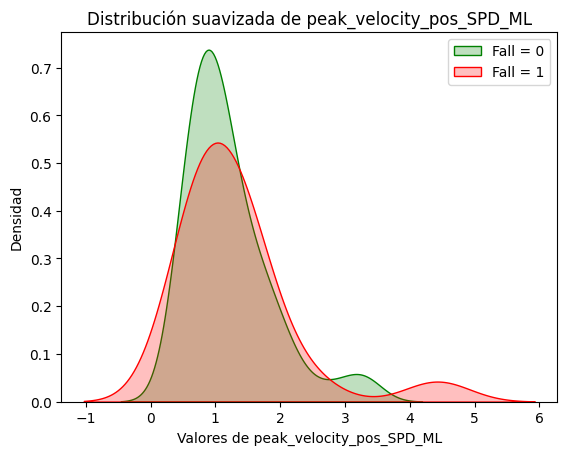

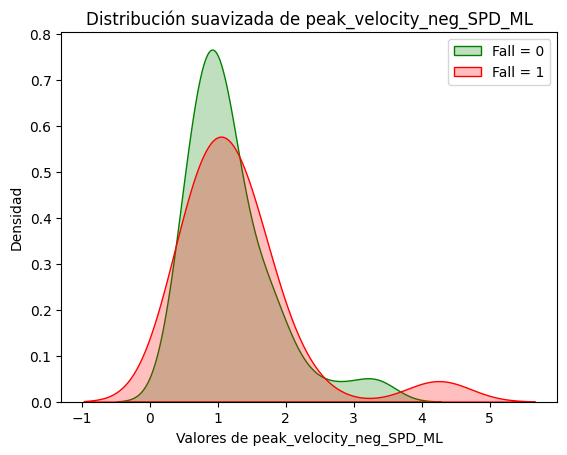

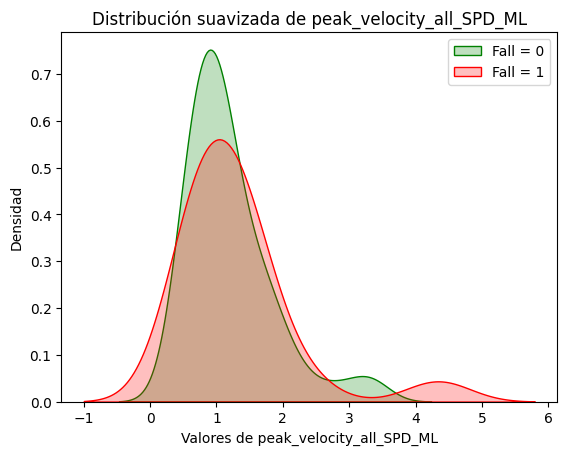

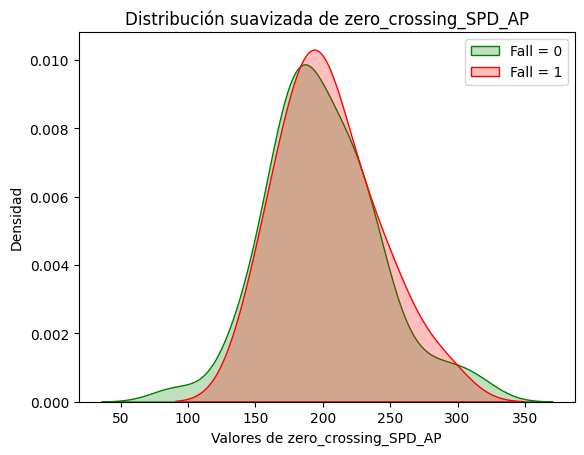

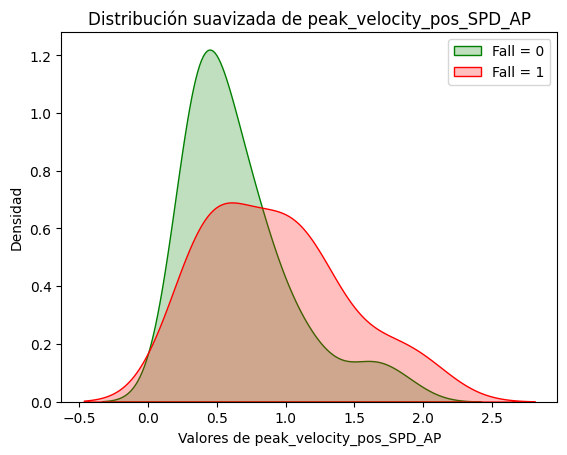

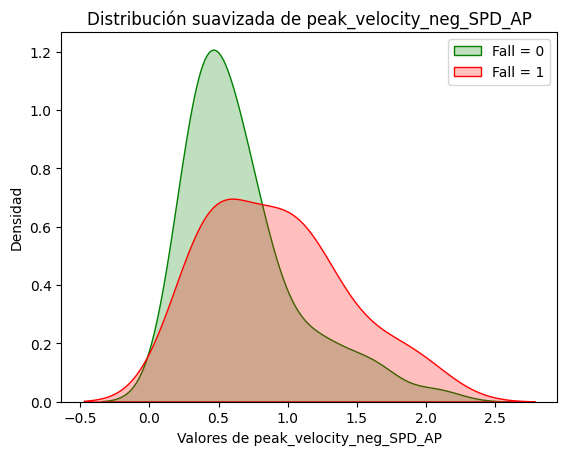

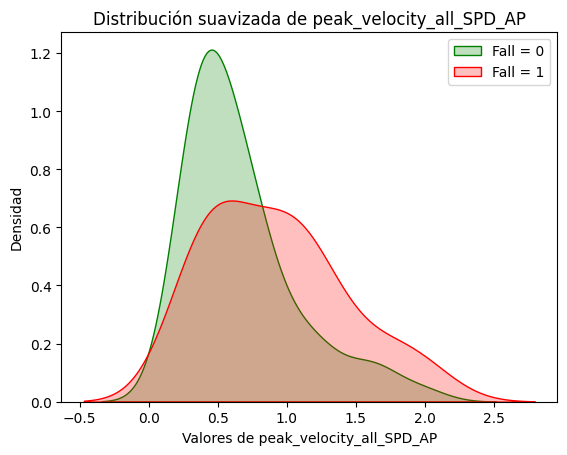

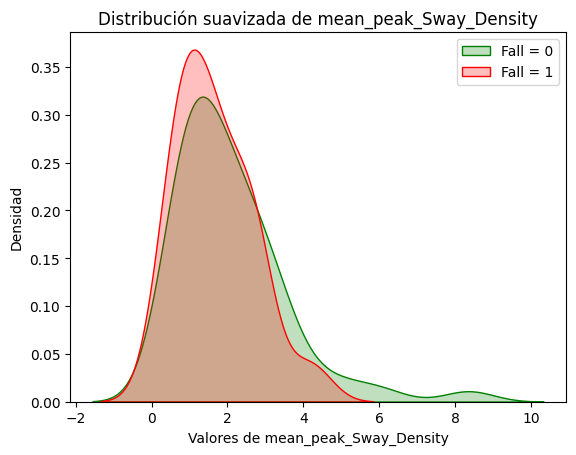

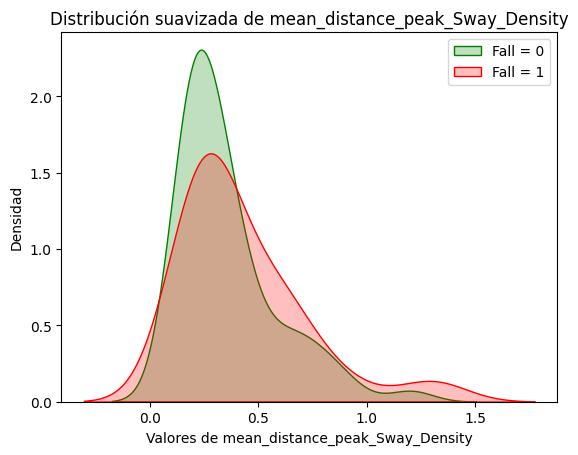

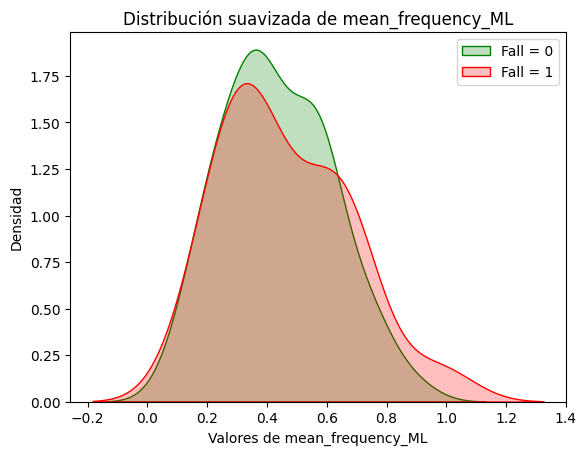

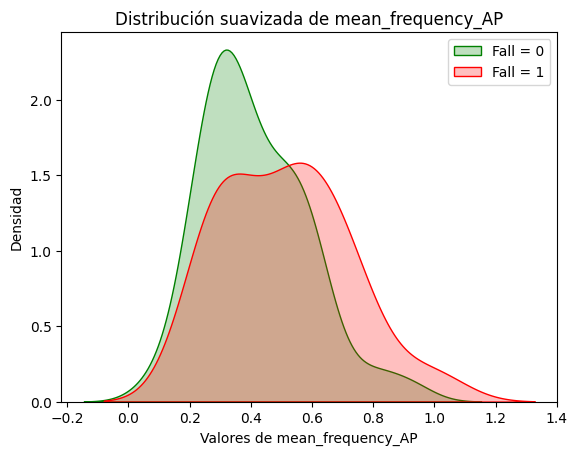

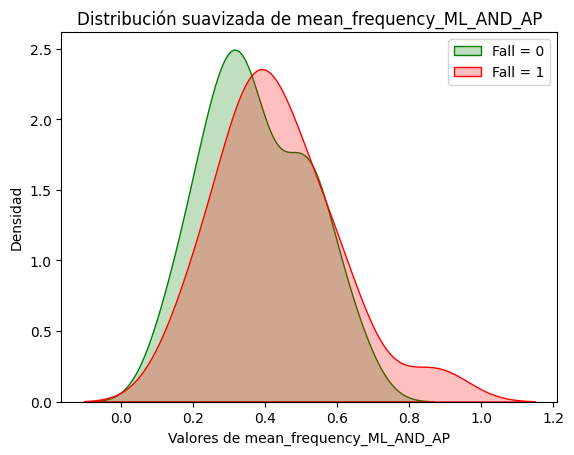

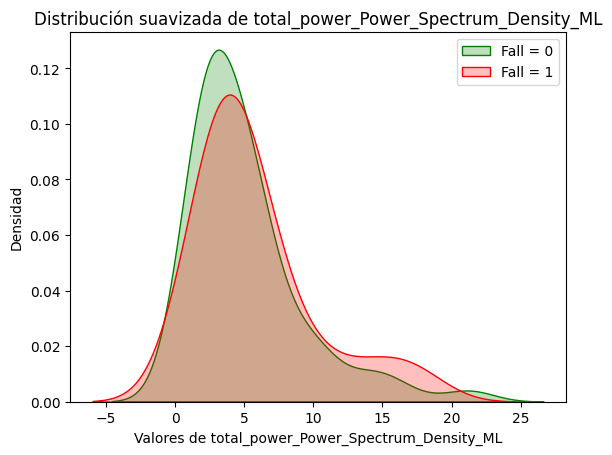

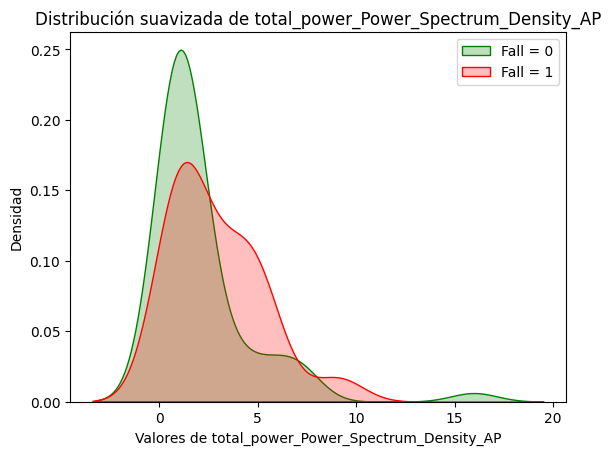

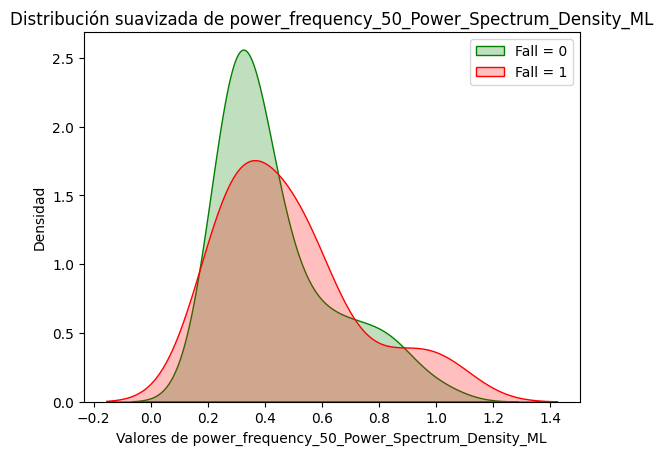

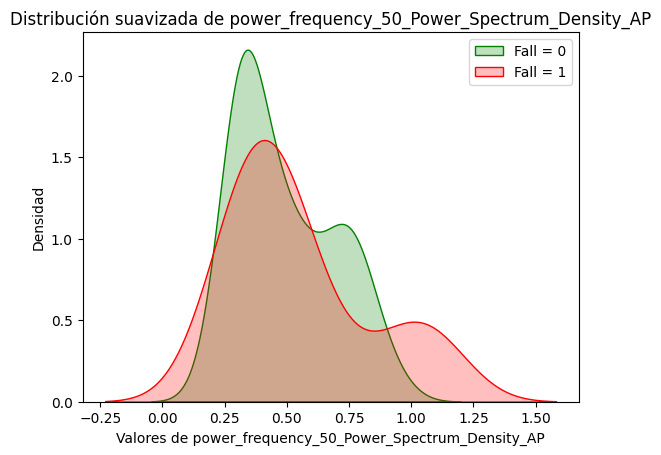

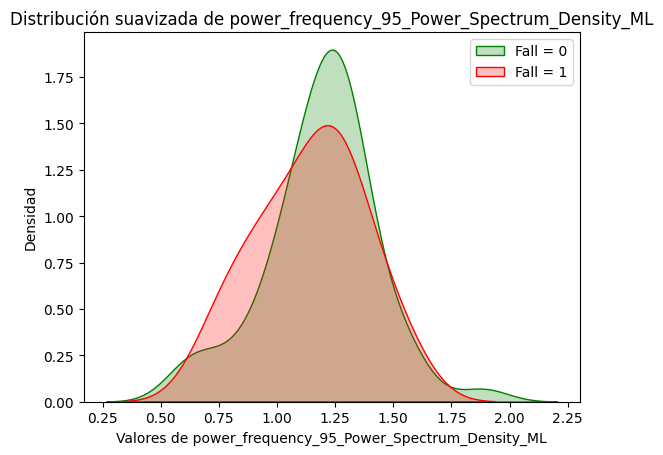

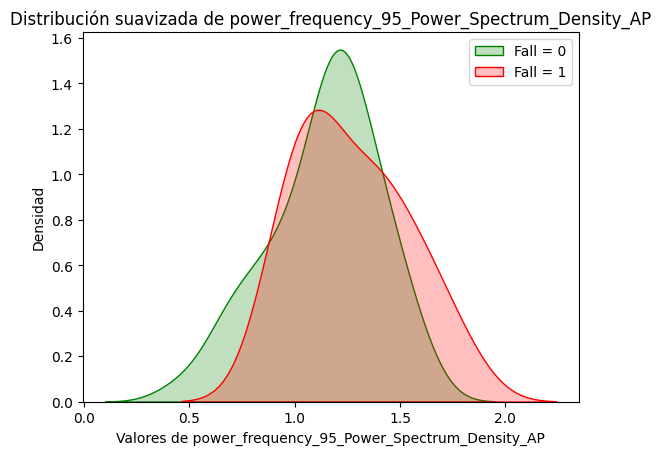

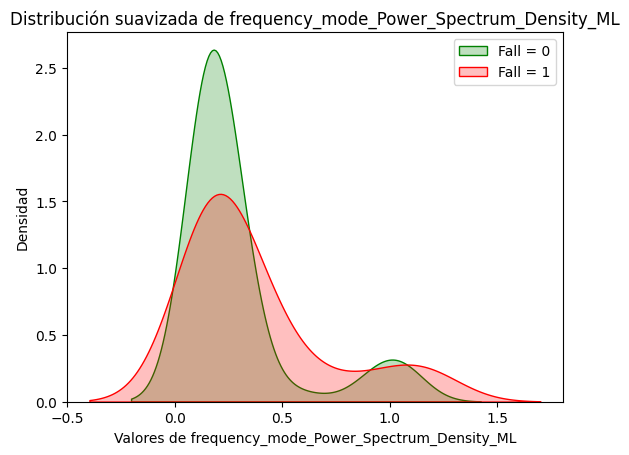

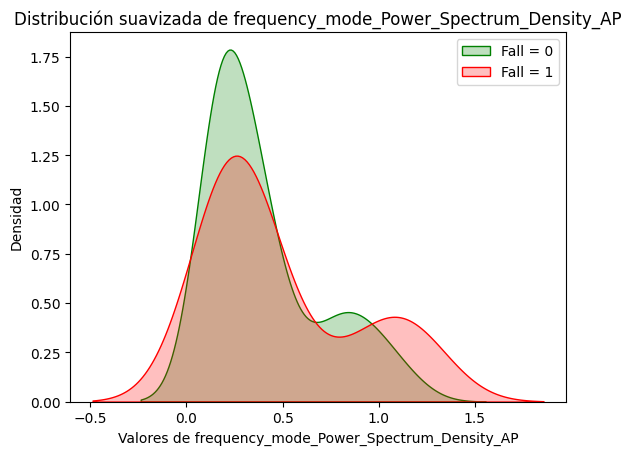

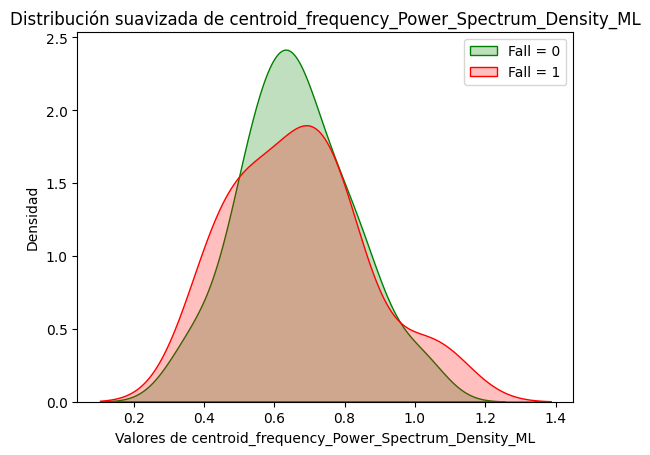

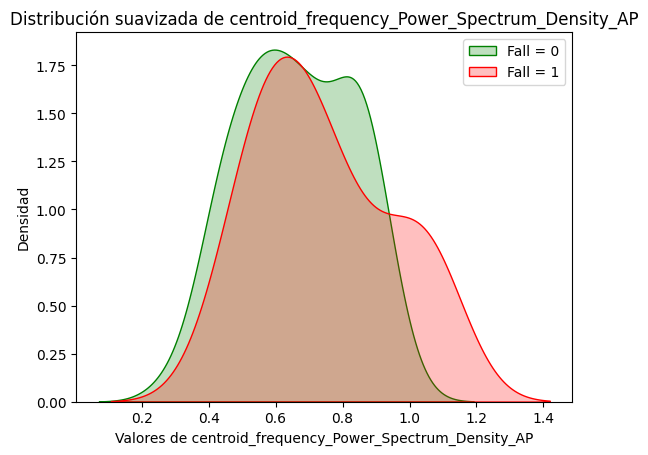

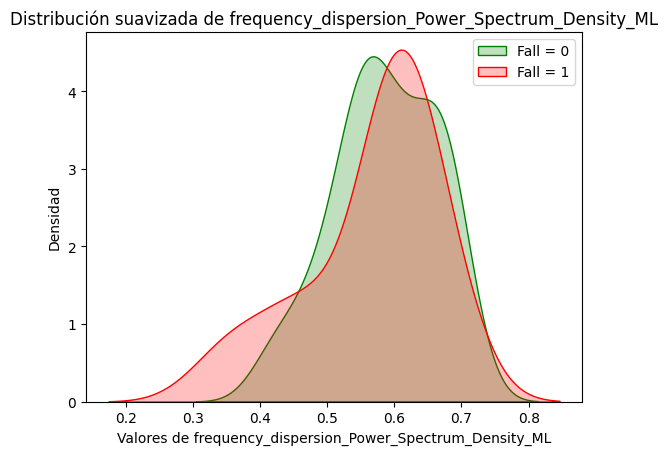

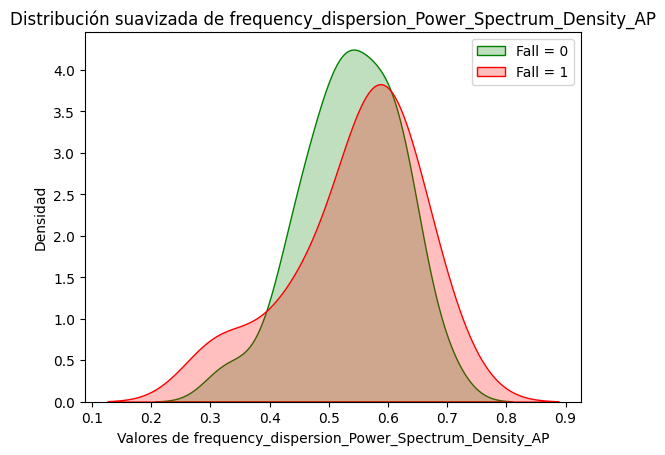

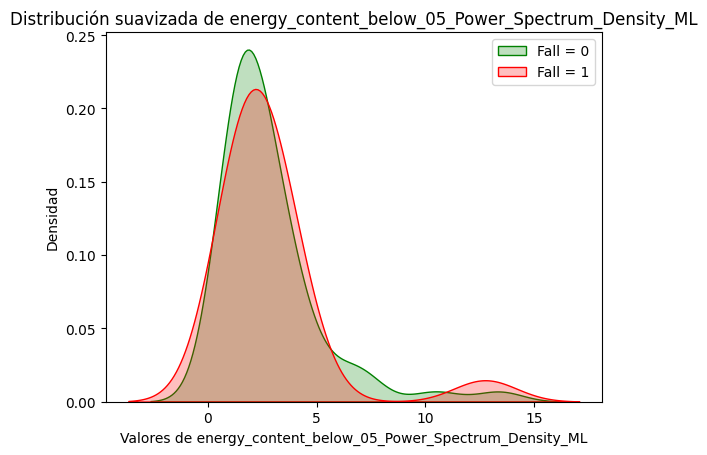

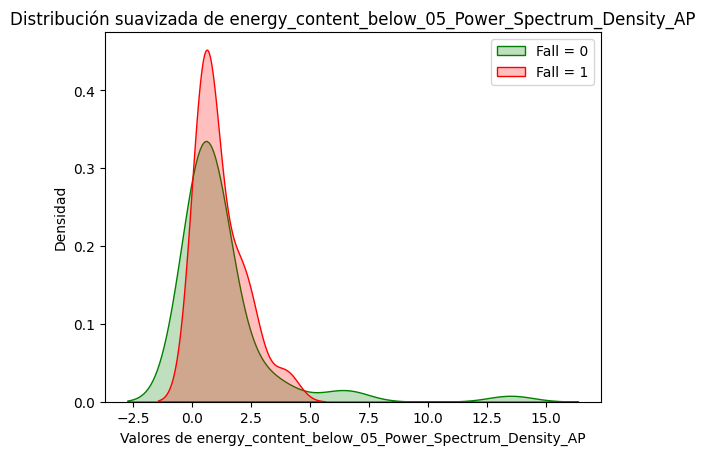

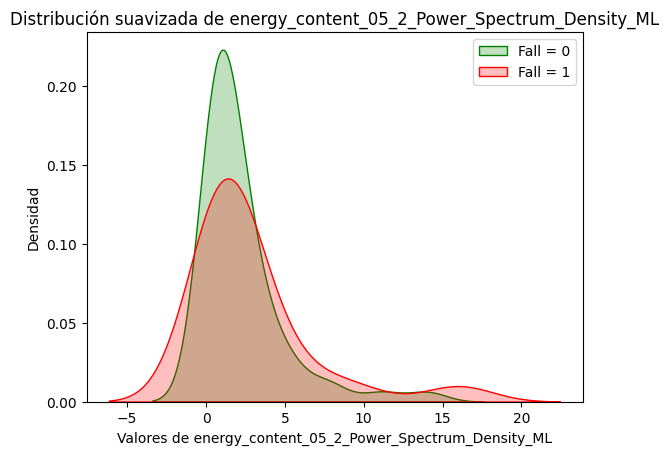

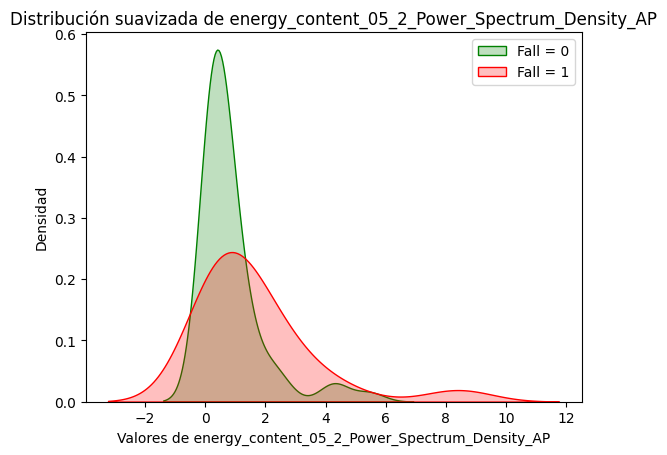

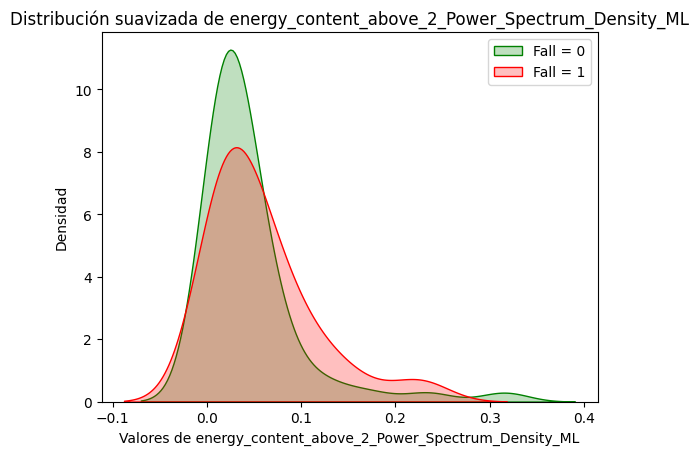

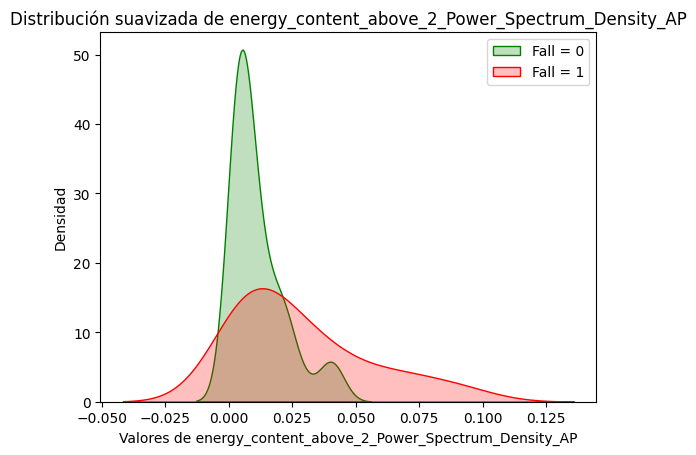

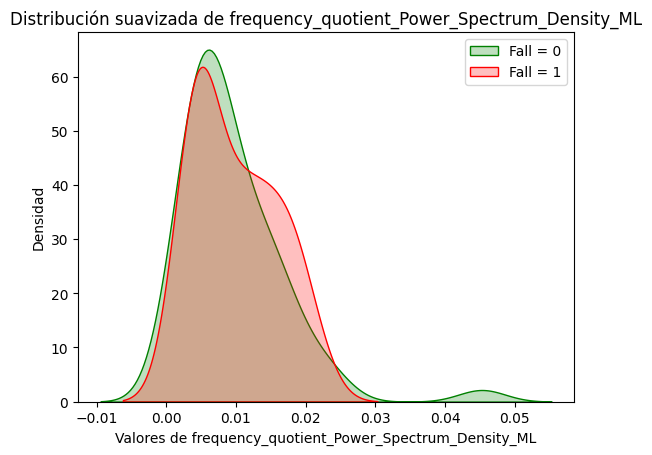

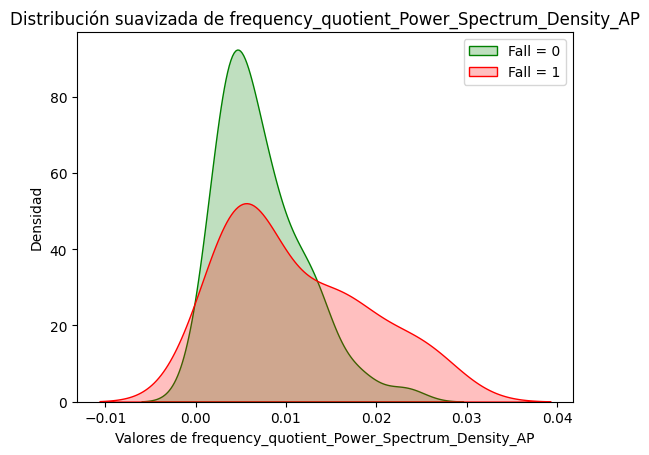

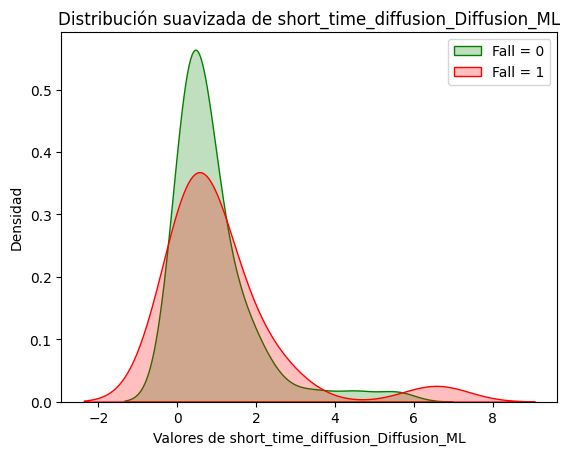

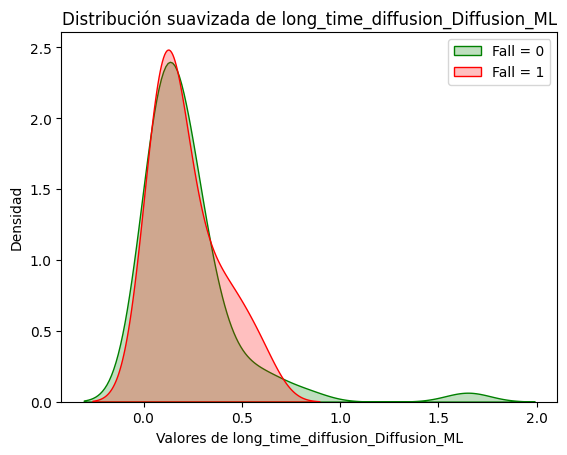

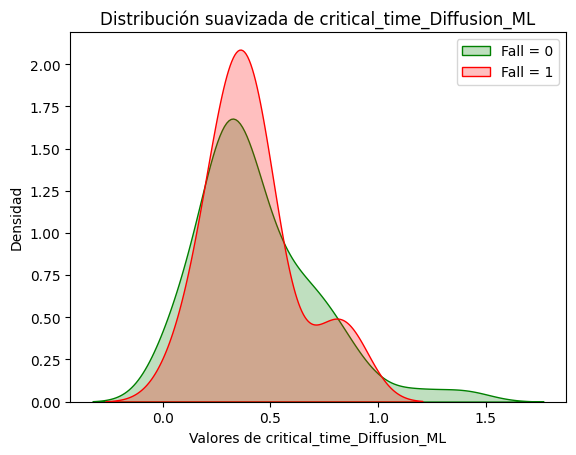

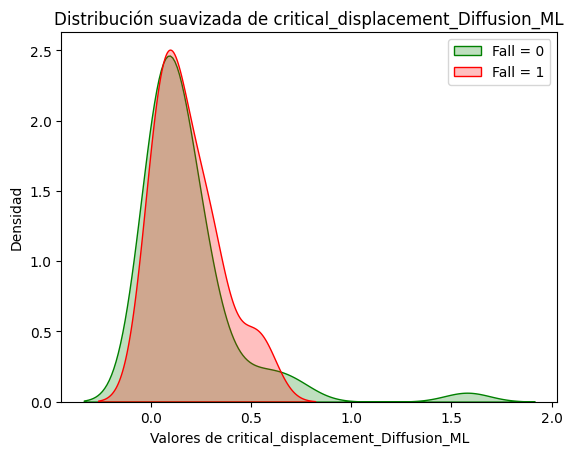

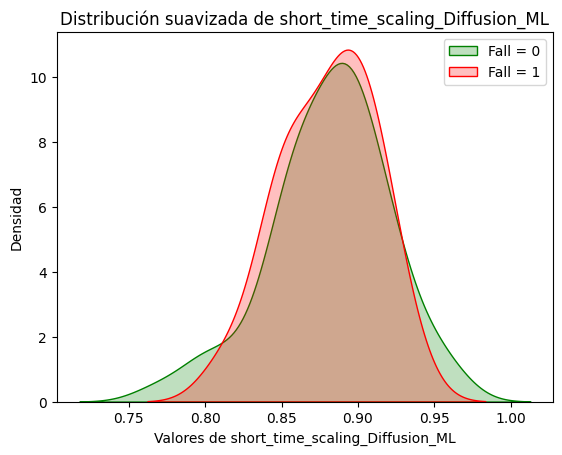

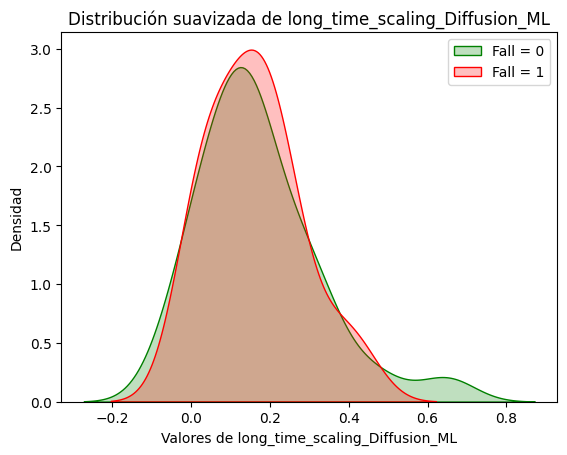

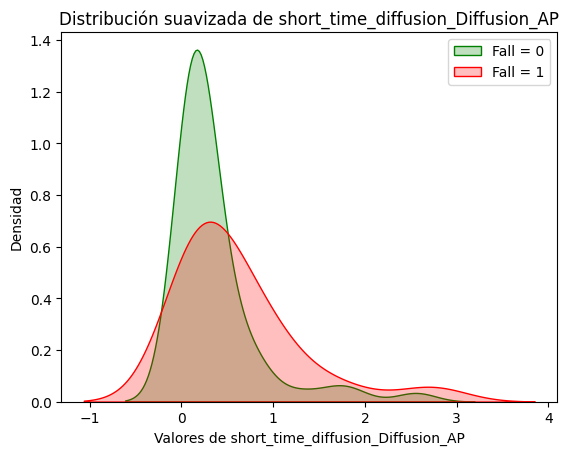

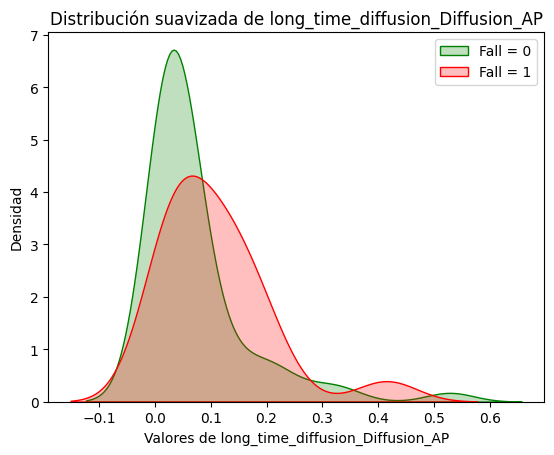

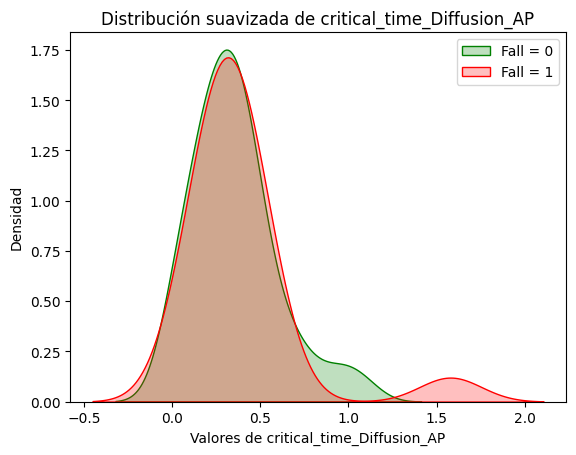

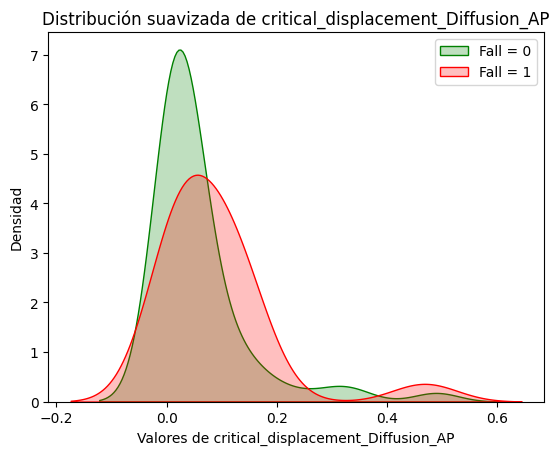

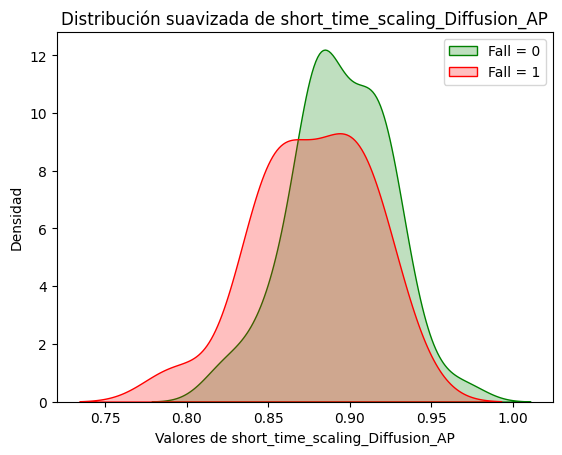

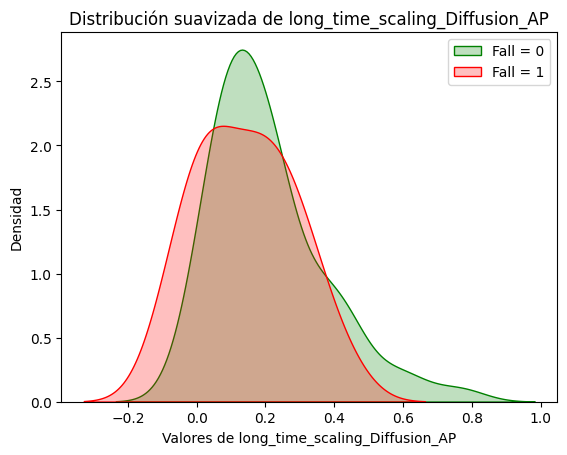

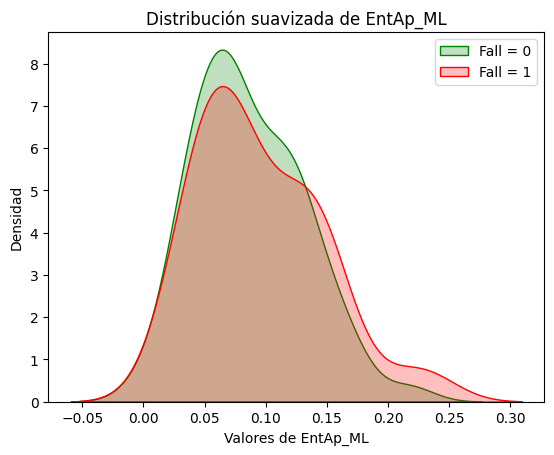

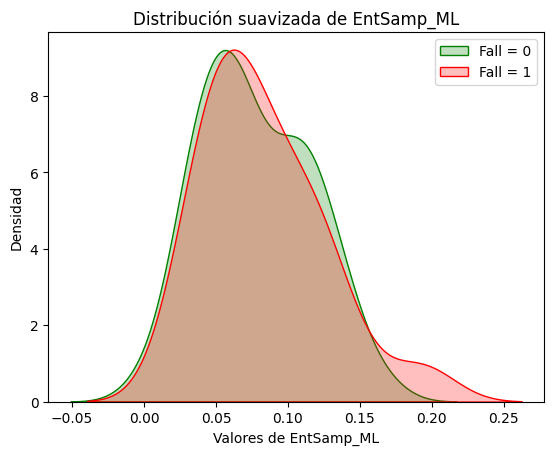

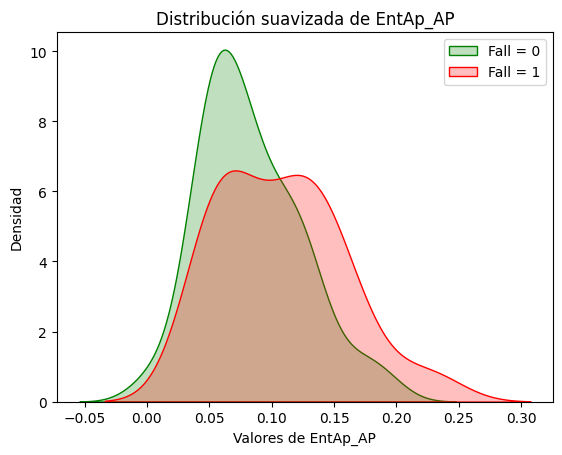

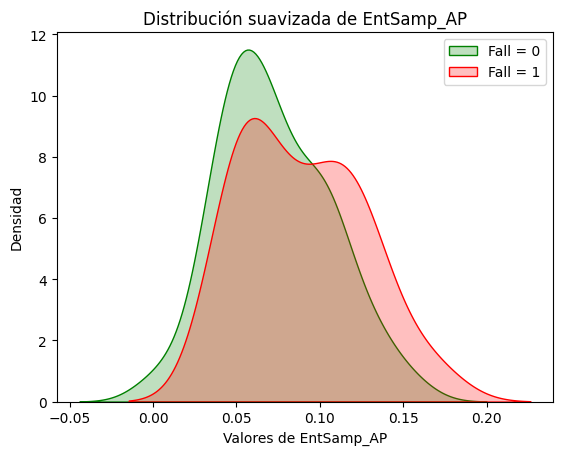

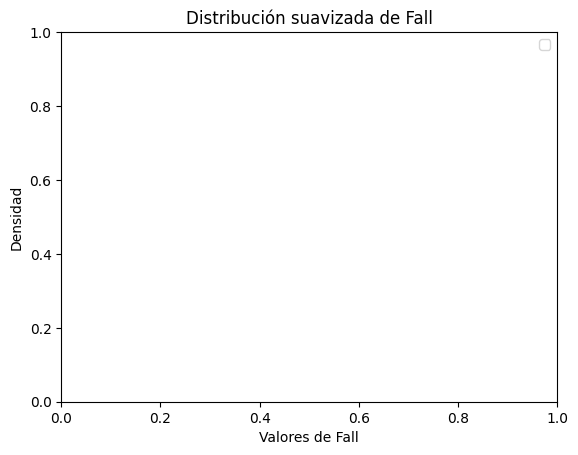

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import pandas as pd

# Crear una lista para almacenar los gráficos
images = []

# Iterar a través de las columnas en 'indices'
for indice in list(indices.columns):
    # Crear una figura y un eje
    fig, ax = plt.subplots()

    # Graficar los KDE suavizados
    sns.kdeplot(data=indices[indices['Fall'] == 0][indice], shade=True, color='green', label='Fall = 0', ax=ax)
    sns.kdeplot(data=indices[indices['Fall'] == 1][indice], shade=True, color='red', label='Fall = 1', ax=ax)

    ax.set_title('Distribución suavizada de ' + indice)
    ax.set_xlabel('Valores de ' + indice)
    ax.set_ylabel('Densidad')
    ax.legend()

    # Guardar la figura en una imagen
    fig.canvas.draw()
    image = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
    images.append(image)

# Crear el GIF a partir de las imágenes
images[0].save('graficos.gif', save_all=True, append_images=images[1:], duration=100, loop=0)



In [88]:
indices.corr()

short_time_diffusion_Diffusion_ML  \
short_time_diffusion_Diffusion_ML                            1.000000   
long_time_diffusion_Diffusion_ML                             0.443502   
critical_time_Diffusion_ML                                  -0.298367   
critical_displacement_Diffusion_ML                           0.361777   
short_time_scaling_Diffusion_ML                              0.069329   
long_time_scaling_Diffusion_ML                              -0.163645   
short_time_diffusion_Diffusion_AP                            0.604903   
long_time_diffusion_Diffusion_AP                             0.271736   
critical_time_Diffusion_AP                                  -0.192916   
critical_displacement_Diffusion_AP                           0.224560   
short_time_scaling_Diffusion_AP                              0.091891   
long_time_scaling_Diffusion_AP                              -0.129437   
EntAp_ML                                                     0.652167   
EntSamp_ML                                                   0.585586   
EntAp_AP                                                     0.417275   
EntSamp_AP                                                   0.346328   
Fall                                                         0.066577   

                                    long_time_diffusion_Diffusion_ML  \
short_time_diffusion_Diffusion_ML                           0.443502   
long_time_diffusion_Diffusion_ML                            1.000000   
critical_time_Diffusion_ML                                  0.472470   
critical_displacement_Diffusion_ML                          0.970607   
short_time_scaling_Diffusion_ML                             0.303355   
long_time_scaling_Diffusion_ML                             -0.401476   
short_time_diffusion_Diffusion_AP                           0.488801   
long_time_diffusion_Diffusion_AP                            0.670192   
critical_time_Diffusion_AP                                  0.085262   
critical_displacement_Diffusion_AP                          0.593044   
short_time_scaling_Diffusion_AP                             0.324731   
long_time_scaling_Diffusion_AP                             -0.103130   
EntAp_ML                                                    0.117494   
EntSamp_ML                                                  0.081087   
EntAp_AP                                                   -0.019433   
EntSamp_AP                                                 -0.049077   
Fall                                                       -0.008936   

                                    critical_time_Diffusion_ML  \
short_time_diffusion_Diffusion_ML                    -0.298367   
long_time_diffusion_Diffusion_ML                      0.472470   
critical_time_Diffusion_ML                            1.000000   
critical_displacement_Diffusion_ML                    0.580092   
short_time_scaling_Diffusion_ML                       0.159020   
long_time_scaling_Diffusion_ML                       -0.577018   
short_time_diffusion_Diffusion_AP                    -0.127761   
long_time_diffusion_Diffusion_AP                      0.215196   
critical_time_Diffusion_AP                            0.337784   
critical_displacement_Diffusion_AP                    0.214329   
short_time_scaling_Diffusion_AP                       0.120633   
long_time_scaling_Diffusion_AP                        0.015276   
EntAp_ML                                             -0.270874   
EntSamp_ML                                           -0.248584   
EntAp_AP                                             -0.337888   
EntSamp_AP                                           -0.320358   
Fall                                                 -0.033134   

                                    critical_displacement_Diffusion_ML  \
short_time_diffusion_Diffusion_ML                             0.361777   
long_time_diffusion_Diffusion_ML                              0.970607   
critical_time

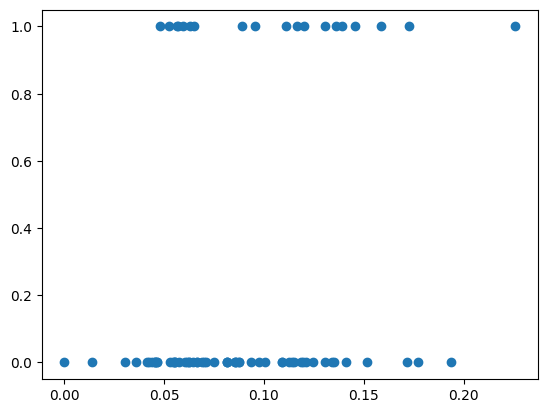

In [89]:
plt.scatter(indices["EntAp_AP"],indices["Fall"])

In [90]:
CoPx1oc.iloc[subject,:]

0       0.770580
1       0.784492
2       0.798321
3       0.811853
4       0.824643
          ...   
5995    0.202787
5996    0.202735
5997    0.198507
5998    0.190623
5999    0.180583
Name: 159, Length: 6000, dtype: float64

In [91]:
indices

short_time_diffusion_Diffusion_ML long_time_diffusion_Diffusion_ML  \
0                           0.197319                         0.022109   
1                           1.633701                         0.429199   
2                           0.201951                         0.057753   
3                           0.250149                         0.145528   
4                           0.784739                         0.107712   
..                               ...                              ...   
72                          0.409423                         0.083405   
73                          5.549704                         0.824666   
74                          0.238907                         0.069602   
75                           0.17175                         0.036944   
58                               NaN                              NaN   

   critical_time_Diffusion_ML critical_displacement_Diffusion_ML  \
0                     0.07989                           0.002579   
1                    0.074483                           0.013517   
2                    0.320478                           0.029114   
3                    0.659694                           0.124799   
4                    0.290174                           0.088071   
..                        ...                                ...   
72                   0.337216                            0.06243   
73                   0.325325                           0.742514   
74                   0.425982                           0.054832   
75                   0.239834                           0.012691   
58                        NaN                                NaN   

   short_time_scaling_Diffusion_ML long_time_scaling_Diffusion_ML  \
0                         0.858156                       0.425086   
1                         0.923055                       0.665722   
2                         0.851014                       0.300967   
3                         0.835801                       0.184704   
4                         0.883881                       0.081355   
..                             ...                            ...   
72                        0.865062                       0.133234   
73                        0.895628                       0.046724   
74                        0.862354                       0.139749   
75                        0.912282                       0.374172   
58                             NaN                            NaN   

   short_time_diffusion_Diffusion_AP long_time_diffusion_Diffusion_AP  \
0                           0.500095                         0.041965   
1                           0.700903                         0.220986   
2                           0.069681                         0.020488   
3                           0.103611                         0.013536   
4                           0.221652                         0.034128   
..                               ...                              ...   
72                          0.333738                         0.051948   
73                          1.853891                         0.168008   
74                          0.091142                         0.006633   
75                          0.097962                         0.037488   
58                               NaN                              NaN   

   critical_time_Diffusion_AP critical_displacement_Diffusion_AP  \
0                    0.191005                           0.029278   
1                    0.432922                           0.154617   
2                    0.489185                           0.018646   
3                    0.143552                           0.004318   
4                    0.308103                           0.025448   
..                        ...                                ...   
72                   0.341936                           0.050272   
73                   0.204126                           0.1

In [92]:
features.keys()

dict_keys(['mean_value_ML', 'mean_value_AP', 'mean_distance_ML', 'mean_distance_AP', 'mean_distance_Radius', 'maximal_distance_ML', 'maximal_distance_AP', 'maximal_distance_Radius', 'rms_ML', 'rms_AP', 'rms_Radius', 'range_ML', 'range_AP', 'range_ML_AND_AP', 'range_ratio_ML_AND_AP', 'planar_deviation_ML_AND_AP', 'coefficient_sway_direction_ML_AND_AP', 'confidence_ellipse_area_ML_AND_AP', 'principal_sway_direction_ML_AND_AP', 'mean_velocity_ML', 'mean_velocity_AP', 'mean_velocity_ML_AND_AP', 'sway_area_per_second_ML_AND_AP', 'phase_plane_parameter_ML', 'phase_plane_parameter_AP', 'LFS_ML_AND_AP', 'fractal_dimension_ML_AND_AP', 'zero_crossing_SPD_ML', 'peak_velocity_pos_SPD_ML', 'peak_velocity_neg_SPD_ML', 'peak_velocity_all_SPD_ML', 'zero_crossing_SPD_AP', 'peak_velocity_pos_SPD_AP', 'peak_velocity_neg_SPD_AP', 'peak_velocity_all_SPD_AP', 'mean_peak_Sway_Density', 'mean_distance_peak_Sway_Density', 'mean_frequency_ML', 'mean_frequency_AP', 'mean_frequency_ML_AND_AP', 'total_power_Power_

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

indices = indices.dropna()

y = indices["Fall"]
X = indices.drop("Fall", axis=1)

# Supongamos que X es tu conjunto de características y y son las etiquetas

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Calcular el AUC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc:.2f}')


F1-Score: 0.00
AUC: 0.45


Precisión del modelo: 0.67
F1-Score: 0.29
AUC: 0.50


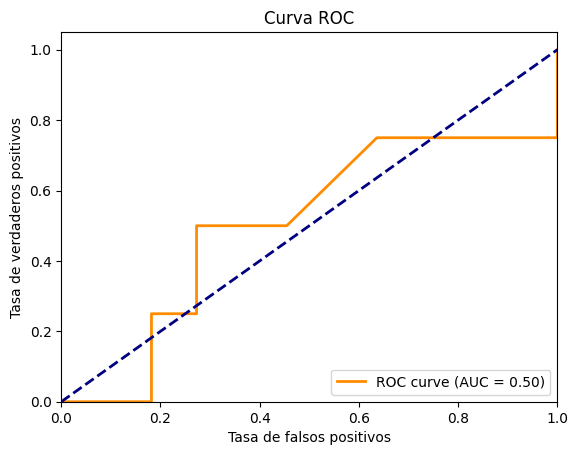

In [94]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Crear un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# Calcular el Área bajo la Curva ROC (AUC)
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Dibujar la curva ROC (opcional)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [95]:
# Importar las bibliotecas necesarias
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score


# Crear un modelo de redes neuronales
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=10))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss:.2f}")
print(f"Precisión: {accuracy * 100:.2f}%")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcular el F1-Score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1-Score: {f1:.2f}")

# Calcular el Área bajo la Curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {roc_auc:.2f}")


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).

: 

## Seccion part 2

In [ ]:

X = (CoPx1oc.iloc[1,:].index.values).reshape(-1, 1)
y = CoPx1oc.iloc[1,:].values

In [ ]:
import numpy as np
from scipy.signal import resample

# Genera una señal de ejemplo (reemplaza esto con tu señal)
frecuencia_muestreo_original = 100  # Frecuencia de muestreo original en Hz
t_original = np.arange(0, 60, 1 / frecuencia_muestreo_original)
senal_original =  CoPx1oc.iloc[1,:].values

# Frecuencia de muestreo deseada
frecuencia_muestreo_deseada = 10  # Hz

# Calcula el factor de remuestreo
factor_remuestreo = frecuencia_muestreo_deseada / frecuencia_muestreo_original

# Realiza el remuestreo de la señal
senal_remuestreada = resample(senal_original, int(len(senal_original) * factor_remuestreo))

# Imprime las longitudes de las señales original y remuestreada
print("Longitud de la señal original:", len(senal_original))
print("Longitud de la señal remuestreada:", len(senal_remuestreada))

In [ ]:
from scipy.stats import levene

# Genera dos series de tiempo dependientes de diferente tamaño (reemplaza esto con tus datos)
serie_tiempo_1 = senal_original
serie_tiempo_2 = senal_remuestreada # Tamaños diferentes

# Realiza la prueba de Levene para comparar las varianzas
estadistica_levene, p_valor_levene = levene(serie_tiempo_1, serie_tiempo_2)

# Imprime los resultados
print("Estadística de Levene:", estadistica_levene)
print("Valor p de Levene:", p_valor_levene)

# Interpreta los resultados
nivel_de_significancia = 0.05  # Nivel de significancia (por ejemplo, 0.05)
if p_valor_levene < nivel_de_significancia:
    print("Se rechaza la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia de diferencias significativas en las varianzas.")




In [ ]:
import matplotlib.pyplot as plt
plt.plot( np.arange(0, 6000 , 10),senal_remuestreada)
plt.plot( np.arange(0, 6000 , 1), senal_original)

In [ ]:
int(len(senal_remuestreada)**(0.5))


In [ ]:
(tau,ami)=AMI_Stergiou.AMI_Stergiou(senal_original,3000)

In [ ]:
tau

In [ ]:
(tau,ami) = AMI_Thomas.AMI_Thomas(senal_remuestreada,34)	

In [ ]:
tau

In [ ]:
[dim]=FNN.FNN(senal_remuestreada,tau[0],5,0.01,0.1,0)	

In [ ]:
[out,LyE] = LyE_R.LyE_R(senal_remuestreada,20,tau,dim)

In [ ]:
from pysr import PySRRegressor


X = np.arange(0, 6000 , 10).reshape(-1, 1)
y= senal_remuestreada

model = PySRRegressor(
    niterations=1500,  # < Increase me for better results
    binary_operators=["+", "*", "-"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

model.fit(X, y)

print(model)

NameError: name 'senal_remuestreada' is not defined

In [ ]:
model.sympy(index=16)

In [ ]:
plt.plot(y)
plt.plot(model.predict(X))

In [ ]:
model = PySRRegressor.from_file("hall_of_fame_2023-09-30_220114.388.pkl")

In [ ]:
model.predict(np.array([0]).reshape(1, -1))[0]

In [ ]:
model.predict(np.array([2.17]).reshape(1, -1))[0]

In [ ]:
np.arange(0,5,0.5)

In [ ]:
# Definir la función que representa el sistema dinámico
def logistic_map(x,u):
    return u*(model.predict(np.array([x]).reshape(1, -1))[0])

results = []

for i in np.arange(0,6000,100):
    result = logistic_map(i,0.5)
    results.append(result)

In [ ]:
plt.plot(results)

In [ ]:
import numpy as np

# Definir la función que representa el sistema dinámico
def logistic_map(x,r):
    return r*(model.predict(np.array([x]).reshape(1, -1))[0])

# Parámetros
n_iterations = 100  # Número de iteraciones
r = 3.9              # Parámetro de la ecuación logística
x0 = 0.1             # Condición inicial

# Inicializar listas para almacenar valores de x y log(d|x - x0|)/dt
x_values = []
lyapunov_values = []

# Iterar para calcular el exponente de Lyapunov
x = x0
for _ in range(n_iterations):
    x_next = logistic_map(x, r)
    delta_x = abs(x_next - x)
    lyapunov_values.append(np.log(delta_x))
    x_values.append(x)
    x = x_next

# Calcular el exponente de Lyapunov como el promedio de log(d|x - x0|)/dt
lyapunov_exponent = np.mean(lyapunov_values)

print(f"Exponente de Lyapunov: {lyapunov_exponent:.4f}")


In [ ]:
# Calcular el exponente de Lyapunov como el promedio de log(d|x - x0|)/dt
lyapunov_exponent = np.mean(lyapunov_values)

print(f"Exponente de Lyapunov: {lyapunov_exponent:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función que calcula una secuencia de valores para un parámetro "r"
def bifurcation_diagram(r_values, x0, n_iterations):
    x = x0
    result = []
    for r in r_values:
        values = []
        for _ in range(n_iterations):
            x = logistic_map(x, r)
            values.append(x)
        result.append(values)
    return result

# Definir la función que representa el sistema dinámico (ecuación logística)
def logistic_map(x,u):
    return u*(model.predict(np.array([x]).reshape(1, -1))[0])

# Parámetros
r_values = np.linspace(2.4, 4.0, 400)  # Rango de valores de "r"
x0 = 0.5  # Condición inicial
n_iterations = 100  # Número de iteraciones por valor de "r"

# Crear el diagrama de bifurcación
bifurcation_data = bifurcation_diagram(r_values, x0, n_iterations)

# Visualizar el diagrama de bifurcación
plt.figure(figsize=(10, 6))
for i in range(len(bifurcation_data)):
    plt.plot([r_values[i]] * len(bifurcation_data[i]), bifurcation_data[i], ',k', alpha=0.25)
plt.xlabel('Valor de "r"')
plt.ylabel('Valores de "x"')
plt.title('Diagrama de Bifurcación')
plt.show()


In [ ]:
plt.plot(lyapunov_values)

In [ ]:
lyapunov_values

# Binary tree

In [9]:
datos = {'CoPy': CoPx1oc.iloc[subject, :].values }

In [10]:
datos

{'CoPy': array([0.77058 , 0.784492, 0.798321, ..., 0.198507, 0.190623, 0.180583])}

In [11]:
np.mean(CoPx1oc.iloc[subject, :].values)

0.7303334705000001

In [12]:
CoPx1oc

0         1         2         3         4         5         6     \
5    1.885677  1.879149  1.872770  1.866802  1.861672  1.857943  1.856183   
15   0.899370  0.879704  0.859917  0.840043  0.820276  0.800944  0.782386   
42   0.392523  0.390183  0.388039  0.386169  0.384485  0.382773  0.380773   
43   0.114494  0.113703  0.111380  0.106462  0.098517  0.087767  0.074956   
44  -0.214242 -0.151585 -0.088150 -0.023921  0.039926  0.101122  0.156883   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.978888  0.990660  1.003127  1.016864  1.032314  1.049688  1.068902   
156  0.874060  0.900901  0.927893  0.955481  0.984656  1.016832  1.053493   
157  1.294313  1.273764  1.250382  1.221928  1.187071  1.145521  1.097887   
158 -0.072470 -0.067449 -0.061567 -0.054240 -0.045256 -0.034787 -0.023298   
159  0.770580  0.784492  0.798321  0.811853  0.824643  0.836039  0.845291   

         7         8         9     ...      5990      5991      5992  \
5    1.856774  1.859737  1.864692  ...  0.692038  0.694740  0.698427   
15   0.764773  0.747948  0.731361  ... -1.358845 -1.351818 -1.346708   
42   0.378239  0.374977  0.370869  ... -1.470679 -1.474070 -1.478414   
43   0.061111  0.047291  0.034346  ... -1.677267 -1.679357 -1.681190   
44   0.204718  0.243157  0.272106  ... -0.197289 -0.202617 -0.204854   
..        ...       ...       ...  ...       ...       ...       ...   
155  1.089587  1.111207  1.133274  ...  0.257991  0.252406  0.247513   
156  1.095769  1.144113  1.198170  ...  0.299775  0.311446  0.324314   
157  1.045352  0.989281  0.930905  ... -0.800180 -0.769971 -0.742431   
158 -0.011411  0.000253  0.011205  ...  0.074304  0.076005  0.073035   
159  0.851710  0.854849  0.854671  ...  0.166939  0.175579  0.184377   

         5993      5994      5995      5996      5997      5998      5999  
5    0.701312  0.700713  0.693614  0.677543  0.651564  0.616971  0.577328  
15  -1.342418 -1.337317 -1.329415 -1.316882 -1.298778 -1.275655 -1.249653  
42  -1.482985 -1.486520 -1.487409 -1.484168 -1.476040 -1.463498 -1.448337  
43  -1.682512 -1.683353 -1.684069 -1.685210 -1.687239 -1.690263 -1.693932  
44  -0.208530 -0.221801 -0.254732 -0.316186 -0.410152 -0.532961 -0.672943  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.243797  0.241898  0.242545  0.246345  0.253493  0.263518  0.275246  
156  0.336011  0.343221  0.342306  0.330357  0.306341  0.271921  0.231461  
157 -0.715972 -0.687837 -0.654819 -0.614277 -0.565152 -0.508610 -0.447938  
158  0.067123  0.061461  0.059976  0.066157  0.081777  0.105980  0.135247  
159  0.192546  0.199065  0.202787  0.202735  0.198507  0.190623  0.180583  

[76 rows x 6000 columns]

In [25]:
cop = CoPx1oc.iloc[subject, :].values

In [26]:
cop.shape[0]

6000

In [23]:
cop.mean()

0.7303334705000001

In [1]:
sum(cop - cop.mean())/cop.shape[0]

NameError: name 'cop' is not defined

In [ ]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

class ArbolBinario:
    def __init__(self, raiz=None):
        self.raiz = raiz

    def insertar(self, valor):
        if self.raiz is None:
            self.raiz = Nodo(valor)
        else:
            self._insertar_recursivo(self.raiz, valor)

    def _insertar_recursivo(self, nodo, valor):
        if valor < nodo.valor:
            if nodo.izquierdo is None:
                nodo.izquierdo = Nodo(valor)
            else:
                self._insertar_recursivo(nodo.izquierdo, valor)
        else:
            if nodo.derecho is None:
                nodo.derecho = Nodo(valor)
            else:
                self._insertar_recursivo(nodo.derecho, valor)

    def inorden(self):
        elementos = []
        self._inorden_recursivo(self.raiz, elementos)
        return elementos

    def _inorden_recursivo(self, nodo, elementos):
        if nodo is not None:
            self._inorden_recursivo(nodo.izquierdo, elementos)
            elementos.append(nodo.valor)
            self._inorden_recursivo(nodo.derecho, elementos)

# Ejemplo de uso
if __name__ == "__main__":
    arbol = ArbolBinario()
    valores = [5, 3, 8, 1, 4, 7, 9]

    for valor in valores:
        arbol.insertar(valor)

    print("Recorrido Inorden del árbol binario:", arbol.inorden())


In [9]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

class ArbolBinario:
    def __init__(self):
        self.raiz = None

    def insertar(self, valor):
        if self.raiz is None:
            self.raiz = Nodo(valor)
        else:
            self.raiz = self._insertar_recursivo(self.raiz, valor)

    def _insertar_recursivo(self, nodo, valor):
        if isinstance(valor, (int, float)):
            # Si el valor es un número, lo insertamos en un nuevo nodo
            if nodo is None:
                return Nodo(valor)
            if valor < nodo.valor:
                nodo.izquierdo = self._insertar_recursivo(nodo.izquierdo, valor)
            else:
                nodo.derecho = self._insertar_recursivo(nodo.derecho, valor)
        else:
            # Si el valor es un operador, lo insertamos en el lugar correcto según la prioridad
            if nodo is None:
                return Nodo(valor)
            if self.prioridad(valor) <= self.prioridad(nodo.valor):
                nodo.izquierdo = self._insertar_recursivo(nodo.izquierdo, valor)
            else:
                nodo.derecho = self._insertar_recursivo(nodo.derecho, valor)
        return nodo

    def prioridad(self, operador):
        prioridades = {'+': 1, '-': 1, '*': 2, '/': 2}
        return prioridades.get(operador, 0)

    def inorden(self):
        elementos = []
        self._inorden_recursivo(self.raiz, elementos)
        return elementos

    def _inorden_recursivo(self, nodo, elementos):
        if nodo is not None:
            self._inorden_recursivo(nodo.izquierdo, elementos)
            elementos.append(nodo.valor)
            self._inorden_recursivo(nodo.derecho, elementos)

# Ejemplo de uso
if __name__ == "__main__":
    arbol = ArbolBinario()
    elementos = [5, 3, '+', 8, 1, '*', '/']

    for elemento in elementos:
        arbol.insertar(elemento)

    print("Recorrido Inorden del árbol binario:", arbol.inorden())


TypeError: '<' not supported between instances of 'int' and 'str'

In [10]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None

def construir_arbol_expresion(expresion):
    # Divide la expresión en tokens (números y operadores)
    tokens = expresion.split()

    # Pila para almacenar los nodos y operadores
    pila = []

    for token in tokens:
        if token.isnumeric():
            # Si el token es un número, crea un nodo y lo apila
            pila.append(Nodo(token))
        else:
            # Si el token es un operador, crea un nodo y combina con los últimos dos nodos de la pila
            nodo = Nodo(token)
            nodo.derecho = pila.pop()
            nodo.izquierdo = pila.pop()
            pila.append(nodo)

    # El último elemento de la pila contendrá el árbol completo
    return pila[0]

def recorrer_arbol_inorden(nodo):
    if nodo is not None:
        recorrer_arbol_inorden(nodo.izquierdo)
        print(nodo.valor, end=' ')
        recorrer_arbol_inorden(nodo.derecho)

# Ejemplo de uso
expresion = "3 + 5 * 2"
arbol = construir_arbol_expresion(expresion)
print("Recorrido Inorden del árbol de expresión:")
recorrer_arbol_inorden(arbol)


IndexError: pop from empty list